# Categorical Co-occurrences

`catcoocc` is a library for facilitating the analysis of categorical co-occurrence by means of symmetric matrices, asymmetric matrices, and association rules. It is intended for usage on three main types of data: collections of pairwise sequences (both aligned and not), categorical fields in databases, and matrices of presence/absence (such as for investigation of species co-occurrence in biology). More than statistical significance, interested in effect size and strength of association.

For the purposes of the library, the following definitions are used:

- a co-occurrence is an observation of two categorical elements from two different series
- a population is a collection of co-occurrences which can come from the product of elements observed in two sequences (or, if the sequences are aligned, by n-gram windows), by the properties of an individual in a population, or by the product of presences
- a scorer is a collection of association measures between all the possible products of values in alphabet_x and alphabet_y (including those not observed in the data)
- scorers can be computed according to different methods (such as MLE...), either on raw counts of observed data or on smoothed methods; likewise, the output of scorers can be scaled in different ways
- scorers can be symmetric (such as those coming from chi2 methods) or assymetric (such a Theil U), and can be either restricted to positive values or include negative values, and can be bound or not to a range


In [1]:
# Install the current asymcat package locally
# Note: In most environments, you would install via: pip install asymcat
# This cell is for development/demonstration purposes
import subprocess
import sys

# For Google Colab or similar environments, you might need:
# !pip install asymcat

print("Using local asymcat installation")
print("If running elsewhere, install with: pip install asymcat")

Using local asymcat installation
If running elsewhere, install with: pip install asymcat


In [2]:
from IPython.display import HTML, display

# Import 3rd party libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tabulate

# Import asymcat library (updated from catcoocc)
import asymcat
from asymcat.scorer import CatScorer

def plot_scorer(scorer, alpha_x, alpha_y, title=None, font_scale=2, figsize=(25, 25), subset=None):
    if not title:
        title = ""

    # Fixed: scorer matrix rows should match index, columns should match columns
    matrix = pd.DataFrame(scorer, index=alpha_x, columns=alpha_y)

    if subset:
        matrix = matrix.head(subset)
        matrix = matrix.iloc[:,:subset]

    sns.set(font_scale=font_scale)
    plt.figure(figsize=figsize)

    ax = plt.subplot(111)
    sns.heatmap(matrix, annot=True, fmt='.2f', linewidths=.5, center=0, ax=ax).set_title(title, fontsize=font_scale*figsize[0])

Let's start exploring using a subset of the mushroom dataset.

| class     | cap-shape |
|-----------|-----------|
| poisonous | convex    |
| edible    | convex    |
| edible    | bell      |
| poisonous | convex    |
| edible    | convex    |
| edible    | convex    |
| edible    | bell      |
| edible    | bell      |
| poisonous | convex    |
| edible    | bell      |
| edible    | convex    |
| edible    | convex    |
| edible    | bell      |
| poisonous | convex    |
| edible    | convex    |
| edible    | sunken    |
| edible    | flat      |
| poisonous | convex    |
| poisonous | convex    |
| poisonous | convex    |

Mushrooms can be either edible or poisonous, and the cap shapre can be of four types, convex, bell, flat, or sunken. In this subset, flat and sunken are underrepresented, with a single case, both being edibles, but of course it is not safe to eat it?

And now with a sample of CMU


In [3]:
data = asymcat.read_sequences("../resources/cmudict.sample100.tsv")
my_cooccs = asymcat.collect_cooccs(data)

# README example - simple synthetic data
my_cooccs = [
             ("A", "c"),
             ("A", "d"),
             ("A", "c"),
             ("B", "g"),
             ("B", "g"),
             ("B", "f"),
]

scorer = CatScorer(my_cooccs)

mle = scorer.mle()
pmi = scorer.pmi()
chi2 = scorer.chi2()
cramersv = scorer.cramers_v()
fisher = scorer.fisher()
theil_u = scorer.theil_u()
cond_entropy = scorer.cond_entropy()
tresoldi = scorer.tresoldi()

headers = [
    'pair',
    'mle_xy',           'mle_yx', 
    'pmi_xy',           'pmi_yx', 
    'chi2_xy',          'chi2_yx', 
    'cremersv_xy',      'cremersv_yx', 
    'fisher_xy',        'fisher_yx', 
    'theilu_xy',        'theilu_yx', 
    'cond_entropy_xy',  'cond_entropy_yx', 
    'tresoldi_xy',      'tresoldi_yx', 
]

table = []
# Get unique pairs from the scorer results
unique_pairs = sorted(set(mle.keys()))
for pair in unique_pairs:
    buf = [
        pair,
        "%0.4f" % mle[pair][0],           "%0.4f" % mle[pair][1],
        "%0.4f" % pmi[pair][0],           "%0.4f" % pmi[pair][1],
        "%0.4f" % chi2[pair][0],          "%0.4f" % chi2[pair][1],
        "%0.4f" % cramersv[pair][0],      "%0.4f" % cramersv[pair][1],
        "%0.4f" % fisher[pair][0],        "%0.4f" % fisher[pair][1],
        "%0.4f" % theil_u[pair][0],       "%0.4f" % theil_u[pair][1],
        "%0.4f" % cond_entropy[pair][0],  "%0.4f" % cond_entropy[pair][1],
        "%0.4f" % tresoldi[pair][0],      "%0.4f" % tresoldi[pair][1],
    ]
    table.append(buf)

    
display(HTML(tabulate.tabulate(table, headers=headers, tablefmt='html')))

pair,mle_xy,mle_yx,pmi_xy,pmi_yx,chi2_xy,chi2_yx,cremersv_xy,cremersv_yx,fisher_xy,fisher_yx,theilu_xy,theilu_yx,cond_entropy_xy,cond_entropy_yx,tresoldi_xy,tresoldi_yx
"('A', 'c')",1,0.6667,0.6931,0.6931,0.75,0.75,0,0,inf,inf,0,1,0.6365,0,1,0.885
"('A', 'd')",1,0.3333,0.6931,0.6931,0,0,0,0,inf,inf,0,1,0.6365,0,1,0.7832
"('A', 'f')",0,0,-1.0986,-1.0986,0,0,0,0,0,0,0.5409,1,0.4774,0,-1.0986,-1.0986
"('A', 'g')",0,0,-1.7918,-1.7918,0.75,0.75,0,0,0,0,0.638,1,0.3819,0,-1.7918,-1.7918
"('B', 'c')",0,0,-1.7918,-1.7918,0.75,0.75,0,0,0,0,0.638,1,0.3819,0,-1.7918,-1.7918
"('B', 'd')",0,0,-1.0986,-1.0986,0,0,0,0,0,0,0.5409,1,0.4774,0,-1.0986,-1.0986
"('B', 'f')",1,0.3333,0.6931,0.6931,0,0,0,0,inf,inf,0,1,0.6365,0,1,0.7832
"('B', 'g')",1,0.6667,0.6931,0.6931,0.75,0.75,0,0,inf,inf,0,1,0.6365,0,1,0.885


and now more

## With Theil U

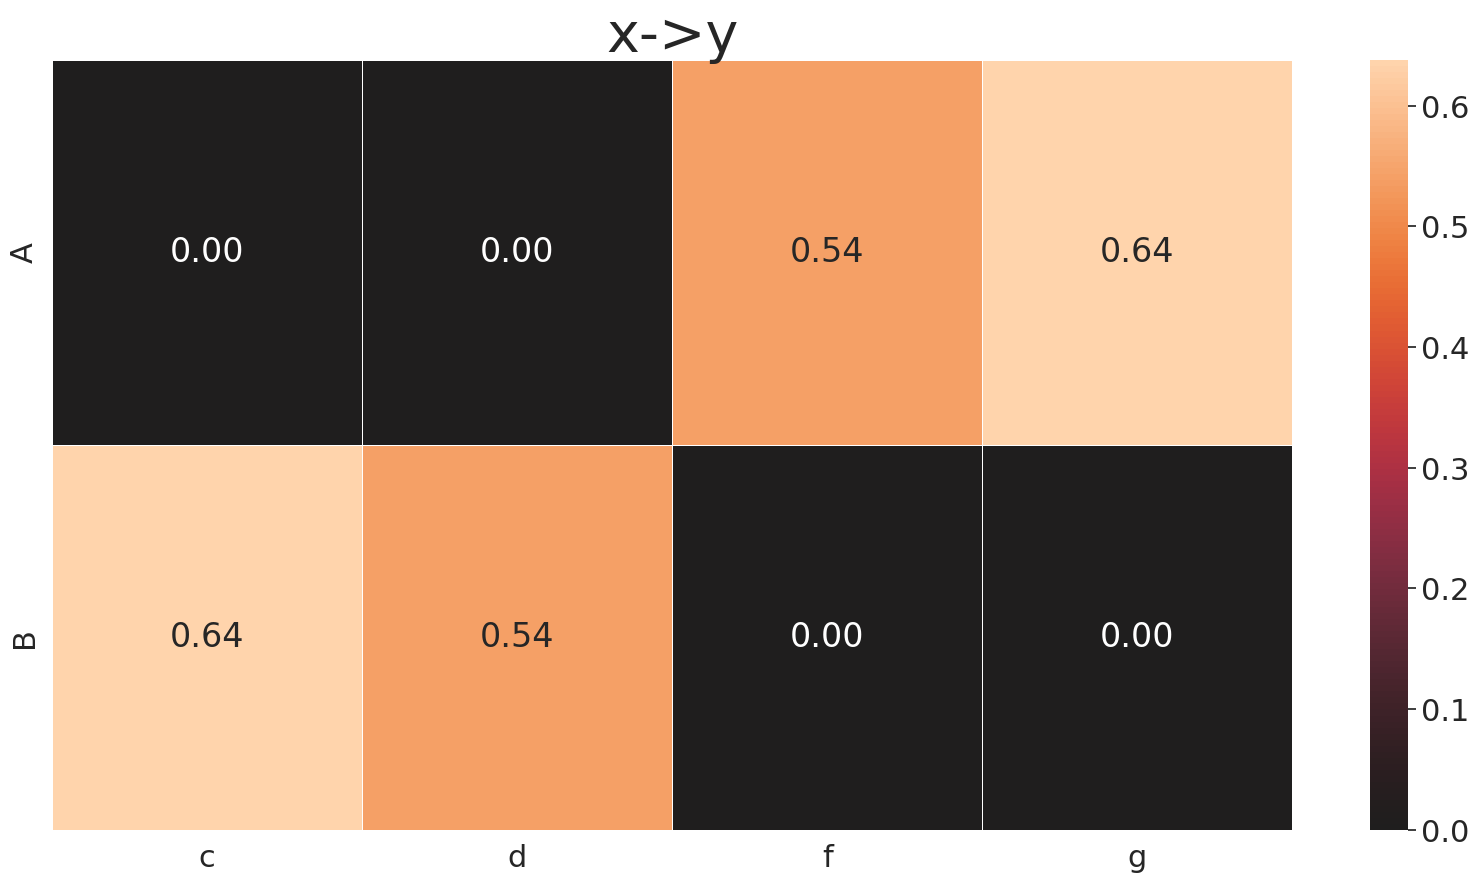

In [4]:
xy, yx, alpha_x, alpha_y = asymcat.scorer.scorer2matrices(theil_u)

figsize = (20, 10)
subset = 5
# xy matrix: shape (len(alpha_x), len(alpha_y)), so index=alpha_x, columns=alpha_y
plot_scorer(xy, alpha_x, alpha_y, "x->y", 2, figsize, subset=subset)

and even more

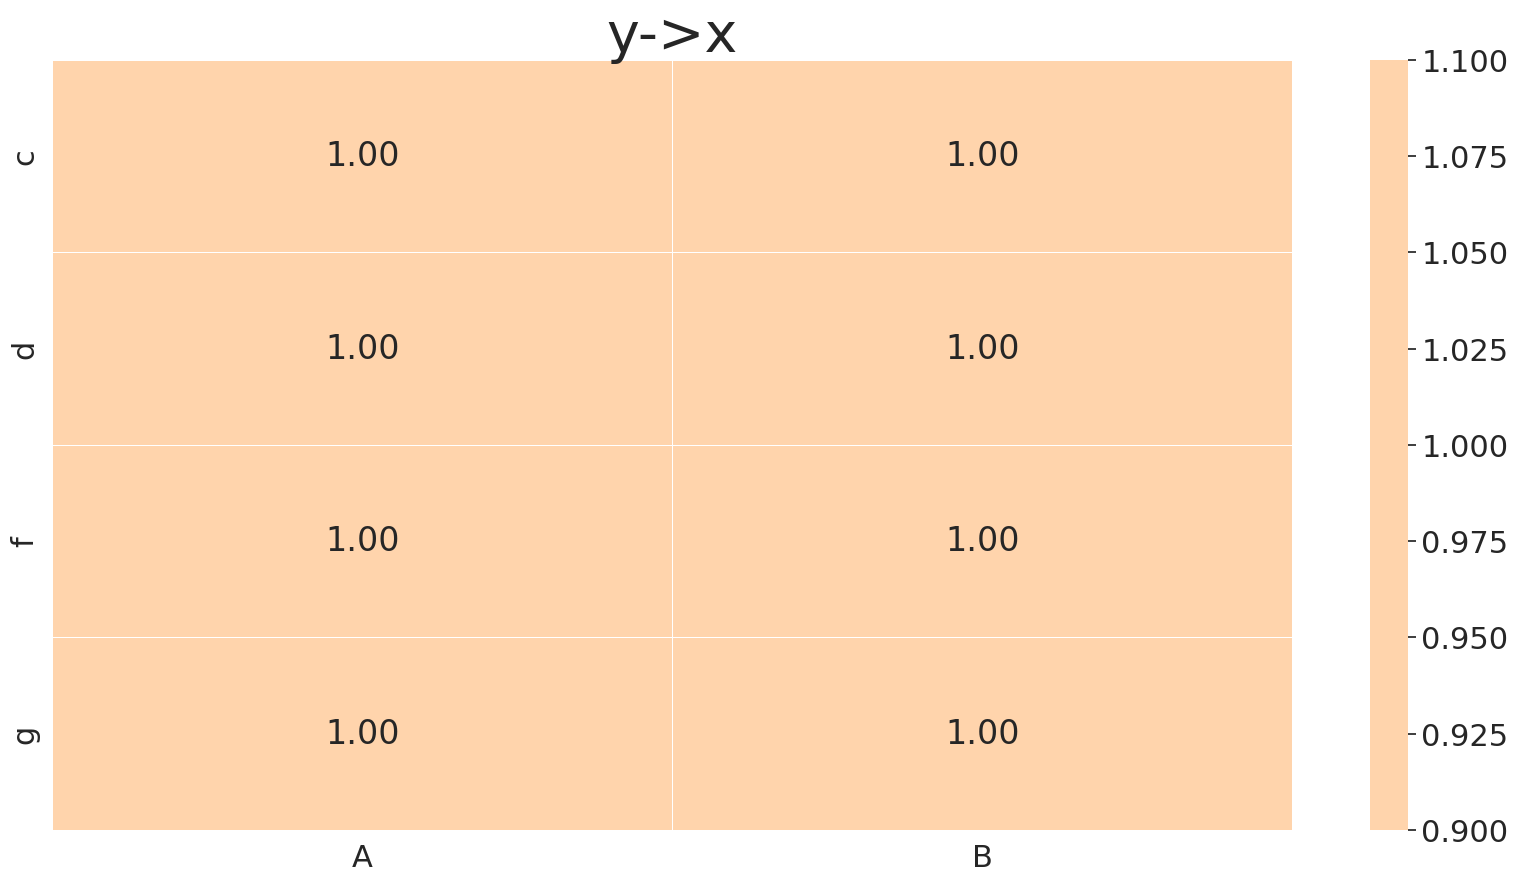

In [5]:
figsize = (20, 10)
subset = 5
# yx matrix: shape (len(alpha_y), len(alpha_x)), so index=alpha_y, columns=alpha_x
plot_scorer(yx, alpha_y, alpha_x, "y->x", 2, figsize, subset=subset)

## With tresoldi

my implementation


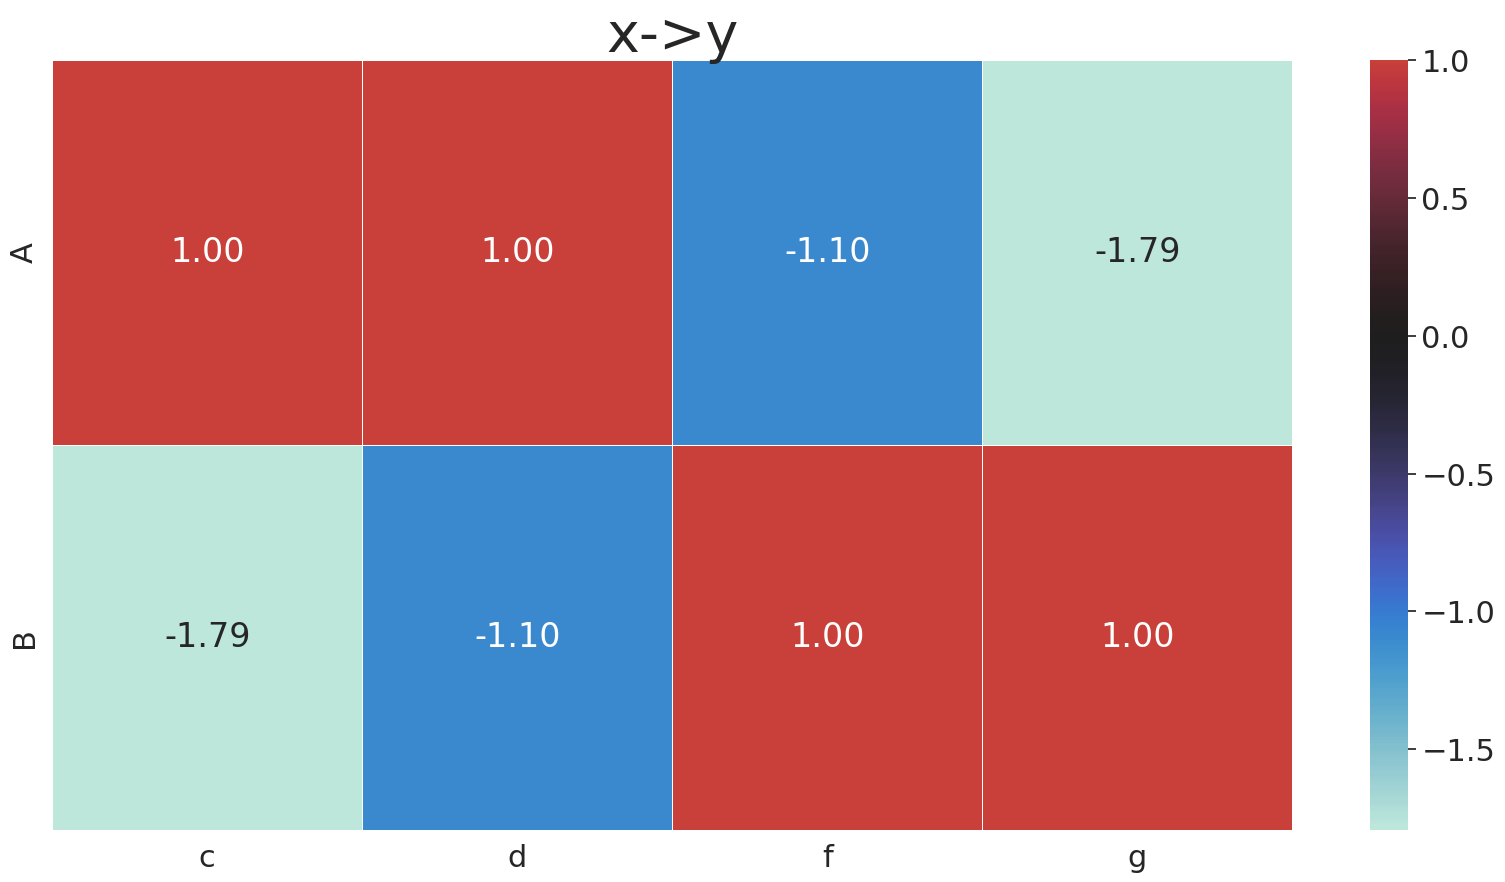

In [6]:
xy, yx, alpha_x, alpha_y = asymcat.scorer.scorer2matrices(tresoldi)

figsize = (20, 10)
subset = 5
# xy matrix: shape (len(alpha_x), len(alpha_y)), so index=alpha_x, columns=alpha_y
plot_scorer(xy, alpha_x, alpha_y, "x->y", 2, figsize, subset=subset)

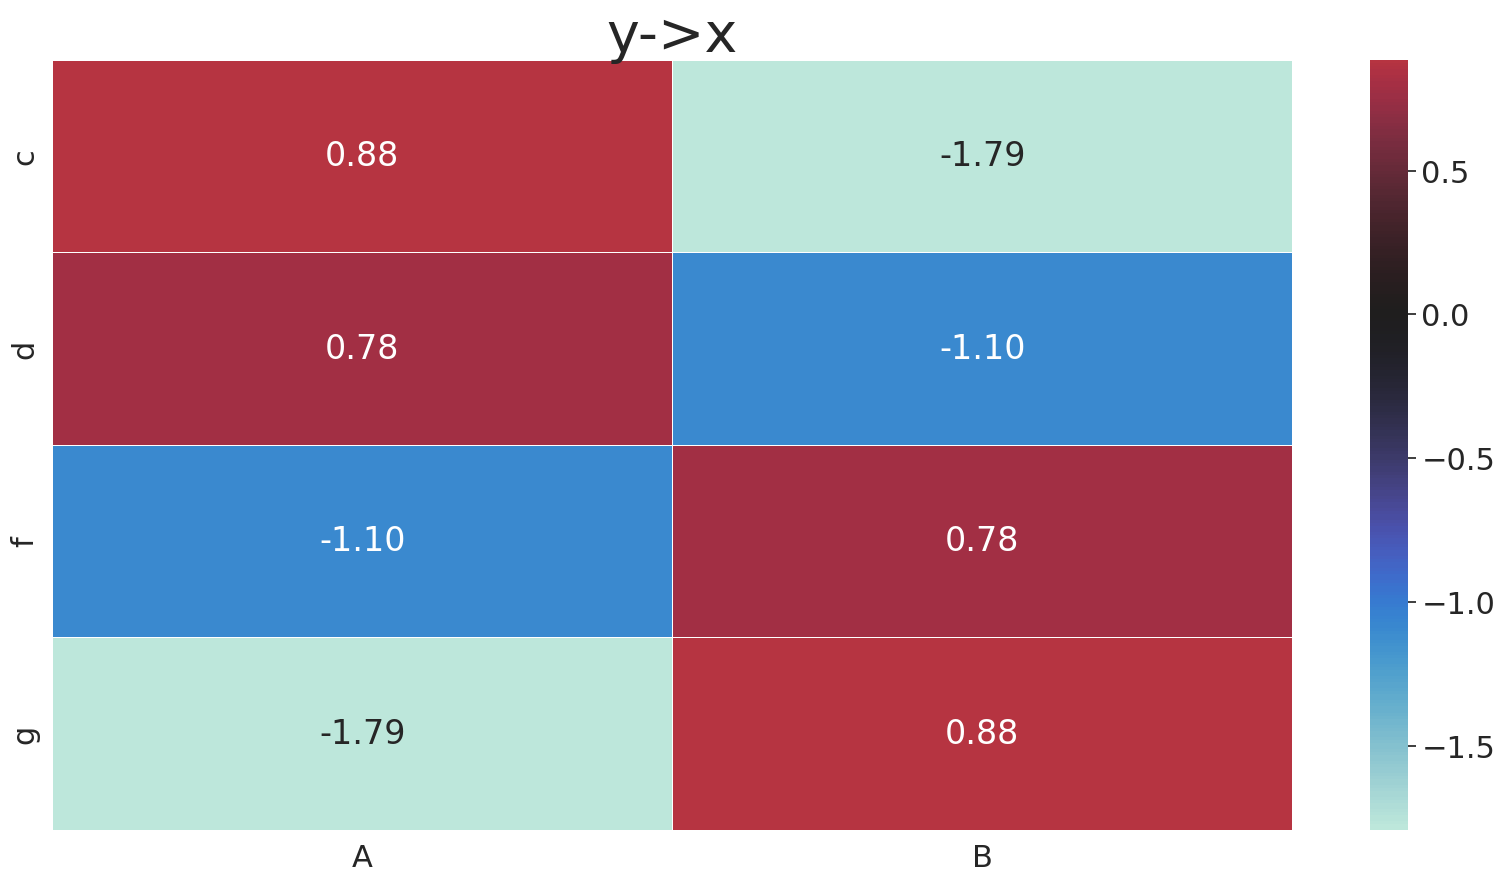

In [7]:
figsize = (20, 10)
subset = 5
# yx matrix: shape (len(alpha_y), len(alpha_x)), so index=alpha_y, columns=alpha_x
plot_scorer(yx, alpha_y, alpha_x, "y->x", 2, figsize, subset=subset)